##### 1) Prepare a classification model using SVM for salary data 

##### Data Description:

- age -- age of a person
- workclass	-- A work class is a grouping of work 
- education	-- Education of an individuals	
- maritalstatus -- Marital status of an individulas	
- occupation	 -- occupation of an individuals
- relationship -- 	
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment	
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week	
- native -- Native of an individual
- Salary -- salary of an individual

##### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import svm, preprocessing, metrics
from sklearn.model_selection import GridSearchCV, train_test_split

import warnings
warnings.filterwarnings('ignore')

##### Reaading the DataFrame

In [2]:
test = pd.read_csv('Buy_Data.csv')
test.head(25)

,Unnamed: 0,BHK,Baths,Total_Area_SqFt,BuiltUp_Area_Sqm,Price_per_SqFt,Type_of_Land,Location,Price
0,0,2,2,959,89,4171,Apartment,Maruthi Nagar,4200000
1,1,11,11,1200,111,15000,Bedroom House,8th Phase JP Nagar,18000000
2,2,3,3,2189,203,10507,Apartment,CV Raman Nagar,23000000
3,3,2,2,1165,108,5579,Apartment,CV Raman Nagar,6500000
4,4,11,11,1973,183,8750,Bedroom House,Chikkalasandra,35000000
5,5,5,5,3500,325,21428,Bedroom House,Chandra Layout,75000000
6,6,3,3,2300,214,13043,Apartment,Spencer Road,30000000
7,7,2,2,1150,107,5391,Apartment,CV Raman Nagar,6200000
8,8,5,5,3500,325,3429,Bedroom House,Suragajakkanahalli,14000000
9,9,2,2,1065,99,6568,Apartment,6th Block Jayanagar,6995000


In [3]:
test = test.drop("Unnamed: 0",axis=1)
test.head()

,BHK,Baths,Total_Area_SqFt,BuiltUp_Area_Sqm,Price_per_SqFt,Type_of_Land,Location,Price
0,2,2,959,89,4171,Apartment,Maruthi Nagar,4200000
1,11,11,1200,111,15000,Bedroom House,8th Phase JP Nagar,18000000
2,3,3,2189,203,10507,Apartment,CV Raman Nagar,23000000
3,2,2,1165,108,5579,Apartment,CV Raman Nagar,6500000
4,11,11,1973,183,8750,Bedroom House,Chikkalasandra,35000000


##### Checking for null values

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BHK               2523 non-null   int64 
 1   Baths             2523 non-null   int64 
 2   Total_Area_SqFt   2523 non-null   int64 
 3   BuiltUp_Area_Sqm  2523 non-null   int64 
 4   Price_per_SqFt    2523 non-null   int64 
 5   Type_of_Land      2523 non-null   object
 6   Location          2523 non-null   object
 7   Price             2523 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 157.8+ KB


In [5]:
test.describe()

,BHK,Baths,Total_Area_SqFt,BuiltUp_Area_Sqm,Price_per_SqFt,Price
count,2523.000000,2523.000000,2.523000e+03,2523.000000,2.523000e+03,2.523000e+03
mean,2.246532,2.178755,7.834782e+03,727.806579,1.208227e+04,1.146521e+07
std,2.117921,2.089434,1.636484e+05,15203.442193,1.998572e+05,1.112083e+07
min,0.000000,0.000000,3.000000e+00,0.000000,1.000000e+00,3.500000e+04
25%,1.000000,1.000000,1.089500e+03,101.000000,4.418000e+03,5.250000e+06
50%,2.000000,2.000000,1.245000e+03,116.000000,5.914000e+03,7.800000e+06
75%,3.000000,3.000000,1.710000e+03,159.000000,8.490000e+03,1.300000e+07
max,32.000000,32.000000,7.623000e+06,708200.000000,1.000000e+07,9.500000e+07


In [6]:
test.isna().sum()

BHK                 0
Baths               0
Total_Area_SqFt     0
BuiltUp_Area_Sqm    0
Price_per_SqFt      0
Type_of_Land        0
Location            0
Price               0
dtype: int64

In [7]:
test.shape

(2523, 8)

##### Checking for duplicates and removing them

In [8]:
sum(test.duplicated())

0

In [9]:
test[test.duplicated(keep = False)]

,BHK,Baths,Total_Area_SqFt,BuiltUp_Area_Sqm,Price_per_SqFt,Type_of_Land,Location,Price


In [10]:
test = test.drop_duplicates()

In [11]:
test.shape

(2523, 8)

##### Converting the categorical columns to numberic

In [12]:
from sklearn.preprocessing import LabelEncoder
for column in test.columns:
    le = LabelEncoder()
    test[column] = le.fit_transform(test[column])

##### Correlation

In [13]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

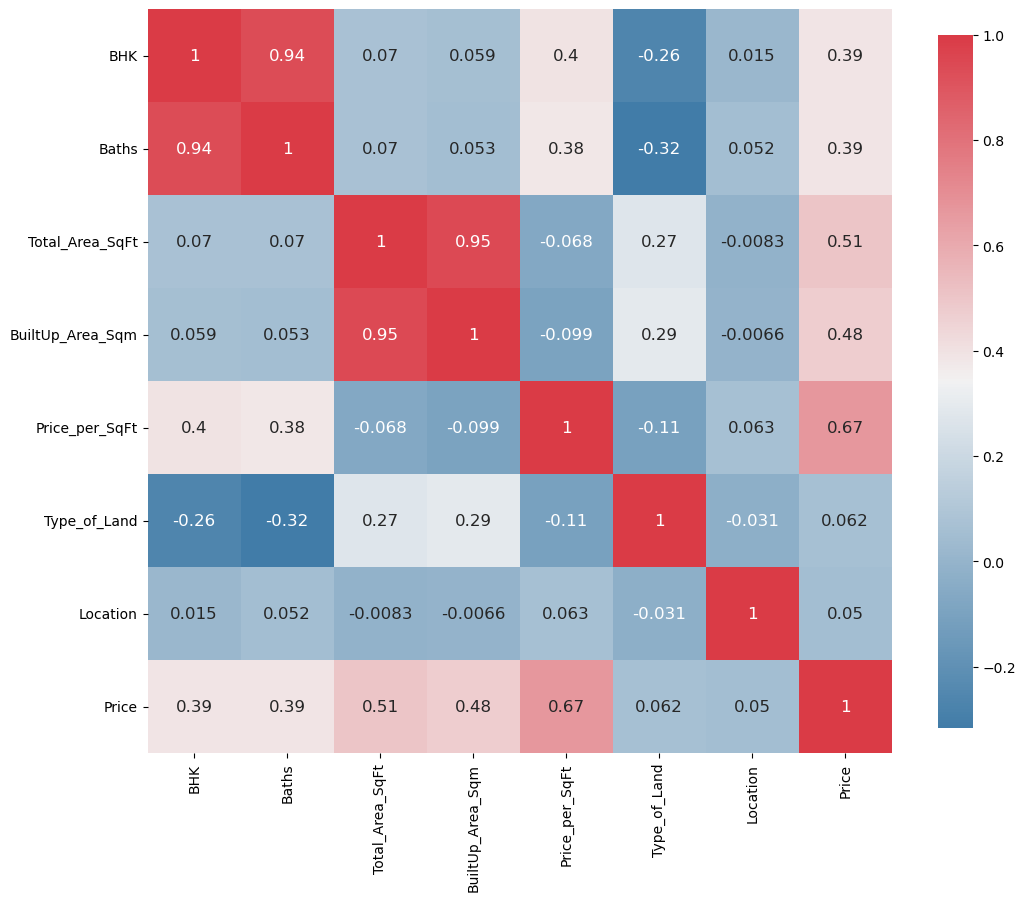

In [14]:
plot_correlation_map(test)

##### Dividing the data into dependent and independent variables and splitting them into test and train data

In [15]:
x=test.iloc[:,0:7]
y=test.iloc[:,7]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=42)

In [17]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1766, 7), (757, 7), (1766,), (757,))

##### GridSearchCV

##### Constructing a SVM model with Kernel 'linear'  and running it on the grid search to identify the best values

In [20]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.05019815059445178


##### Constructing a SVM model with Kernel 'poly'  and running it on the grid search to identify the best values

In [21]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.15191545574636725


##### Constructing a SVM model with Kernel 'rbf'  and running it on the grid search to identify the best values

In [22]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.0726552179656539


##### Constructing a SVM model with Kernel 'sigmoid'  and running it on the grid search to identify the best values

In [23]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.021136063408190225


##### Conclusion

- It is evident that the rbf Kernel in SVM, gives better result in classifying the data, when compared to others.
- Thus, a rbf kernal in SVM can be used to classify the salary data.